# Torus Chain Dataset
This script generates a synthetic dataset, named "Torus Chain", consisting of a chain of 3D torus rings. The chain represents a multi-class classification problem in a 3-dimensional space, with each torus ring forming a separate class. This dataset provides a challenging scenario for machine learning models, as the classes are intertwined in a complex manner.

The algorithm first sets up parameters such as the number of samples per ring, the number of rings, the radius of the torus rings, and the offset between the rings. Random angles are generated for the points on the ring, with these points spread evenly around the entire circumference of each ring.

The main body of the script creates each 3D ring. The torus rings are formed by rotating a circle around an axis in the 3D space, producing the characteristic "doughnut" shape. The rings are then arranged in a chain by applying an offset to the x-coordinates of each subsequent ring. To add complexity, the rings are not all oriented in the same direction but alternate their orientation.

The x, y, and z coordinates for each point are generated based on the ring number, and these coordinates are saved in a data array, with each ring forming a separate class. The labels are generated as consecutive integers.

A portion of the values in the dataset is replaced with NaNs to simulate missing data, which is a common challenge in real-world datasets.

The script concludes by plotting the generated dataset in a 3D scatter plot, visualizing the intertwined rings of the torus chain. The aspect ratio of the plot is adjusted to best represent the dataset and to minimize margins, providing a clear view of the chain of torus rings.

The resulting Torus Chain dataset, consisting of points belonging to each of the torus rings, presents a challenging multi-class classification problem in a 3-dimensional space. The dataset, visualized in the 3D plot, offers a tool for testing, understanding, and illustrating the strengths and weaknesses of various machine learning algorithms.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [14]:
dataset_name = 'torus_chain'

In [15]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_chart_fname = os.path.join(output_dir, f'{dataset_name}_plot.png')

# Generate Data

In [16]:
def get_thetas_and_phis(n_samples):
    """Generate random angles for points on the ring"""
    theta = 2.0 * np.pi * np.random.rand(n_samples)
    phi = 2.0 * np.pi * np.random.rand(n_samples)
    return theta, phi

In [17]:
def generate_3d_ring(theta, phi, radius, tube_radius, offset, ring_num):
    """Generate points on a single 3D ring"""
    is_even = ring_num % 2 == 0
    if is_even:
        x = ring_num * offset + (radius + tube_radius * np.cos(theta)) * np.cos(phi)
        y = (radius + tube_radius * np.cos(theta)) * np.sin(phi)
        z = tube_radius * np.sin(theta)
    else: 
        x = ring_num * offset + (radius + tube_radius * np.cos(theta)) * np.sin(phi)
        y = tube_radius * np.sin(theta)
        z = (radius + tube_radius * np.cos(theta)) * np.cos(phi)
    return x, y, z


In [18]:
def generate_torus_chain_dataframe(n_samples, n_rings):
    """Generate a torus chain of 3D rings and return as pandas DataFrame"""
    theta, phi = get_thetas_and_phis(n_samples)

    X = np.empty((0, 3))
    labels = np.empty((0, ))
    for i in range(n_rings):
        x, y, z = generate_3d_ring(
            theta=theta,
            phi=phi,
            radius=5,
            tube_radius=1,
            offset=6.5,
            ring_num=i
        )
        X = np.vstack([X, np.column_stack([x, y, z])])
        labels = np.hstack([labels, np.full(n_samples, i)])
    
    # Generate unique IDs
    np.random.seed(0)
    ids = np.random.choice(np.arange(n_samples * n_rings), size=n_samples * n_rings, replace=False)
    
    # Create DataFrame
    df = pd.DataFrame(X, columns=['x', 'y', 'z'])
    df['target'] = labels.astype(int)  
    df.insert(0, "id", ids)

    return df

In [19]:
def add_missing_values(df, missing_fraction=0.1):
    """
    Randomly replace a fraction of values in each feature column with NaNs.
    """
    for column in df.columns:
        if column not in ['id', 'target']:
            num_missing = int(missing_fraction * len(df))
            missing_indices = np.random.choice(df.index, num_missing, replace=False)
            df.loc[missing_indices, column] = np.nan
    return df

In [20]:
np.random.seed(0)  # Set the seed for the random number generator
data = generate_torus_chain_dataframe(n_samples=500, n_rings=5)
data = add_missing_values(data)
print(data.shape)
print(data.head())

(2500, 5)
     id         x         y         z  target
0    53 -1.498676  3.758920 -0.301918       0
1  2391 -3.340088  3.423606 -0.976176       0
2  2310 -4.149707 -0.656459 -0.601743       0
3   728  0.015102 -4.039474       NaN       0
4   850 -2.060327  3.559591  0.461505       0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2500 non-null   int32  
 1   x       2250 non-null   float64
 2   y       2250 non-null   float64
 3   z       2250 non-null   float64
 4   target  2500 non-null   int32  
dtypes: float64(3), int32(2)
memory usage: 78.2 KB


# Visualize

In [40]:
def plot_and_save_torus_chain(X, labels, filename):
    """Plot the torus chain and save to a file"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Torus Chain Dataset', fontsize=20, color='#707070')  # Set title for the axes and increase font size
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
    ax.set_box_aspect([3, 1, 1])  # Adjust the aspect ratio of the 3D plot

    ax.set_xlabel('X', color='#707070')  # Set the color for the X-axis title
    ax.set_ylabel('Y', color='#707070')  # Set the color for the Y-axis title
    ax.set_zlabel('Z', color='#707070')  # Set the color for the Z-axis title

    ax.tick_params(colors='#707070')  # Set the color for the axis ticks

    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)  # Adjust subplot parameters
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.savefig(filename, transparent=True)  # Save the plot to a file with a transparent background
    plt.show()


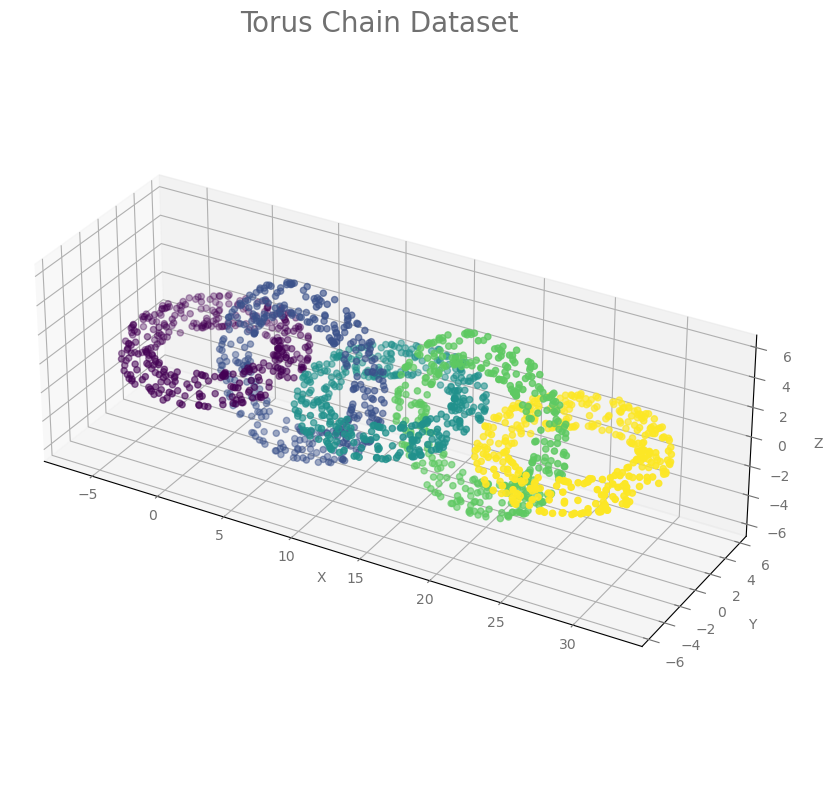

In [41]:
plot_and_save_torus_chain(data[["x", "y", "z"]].values, data["target"], outp_chart_fname)

# Save Main Data File

In [24]:
data.to_csv(outp_fname, index=False)